# Sales Analysis Kaggle Project

## 1. Import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme()

## 2. Load dataset

In [2]:
df = pd.read_csv("Superstore.csv")

### 2.1. Dataset overview

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 2.2. Data Type Conversion
Performed data type conversion (e.g., converting Order Date and Ship Date to datetime, changing categorical fields to category type, and Postal Code to string) to ensure consistency and accuracy in further analysis

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Postal Code'] = df['Postal Code'].astype(str)

categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
df[categorical_cols] = df[categorical_cols].astype("category")

### 2.3. Feature Engineering

Performed feature engineering by extracting temporal features (Year, Month, Quarter, Day of Week) from the `Order Date` field to facilitate time-series analysis of sales and profit trends

In [8]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['DayOfWeek'] = df['Order Date'].dt.day_name()

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Year,Month,Quarter
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,2.882329
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,2.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,3.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,4.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,4.000000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,1.058086


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   category      
 10  State          9994 non-null   category      
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Quarter,DayOfWeek
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,4,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,4,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,4,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,4,Sunday


## 3. EDA

### 3.1. Total Sales, Profit and Orders

In [12]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()

In [13]:
print("Tổng doanh thu:", total_sales)
print("Tổng lợi nhuận:", total_profit)
print("Tổng số đơn hàng:", total_orders)

Tổng doanh thu: 2297200.8603
Tổng lợi nhuận: 286397.0217
Tổng số đơn hàng: 5009


### 3.2. Top 10 best-selling products and Top 10 products with the highest revenue

In [ ]:
# Top 10 best-selling products

top_products_quantity = (df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10))

In [15]:
# Top 10 products with the highest revenue

top_products_sales = (df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10))

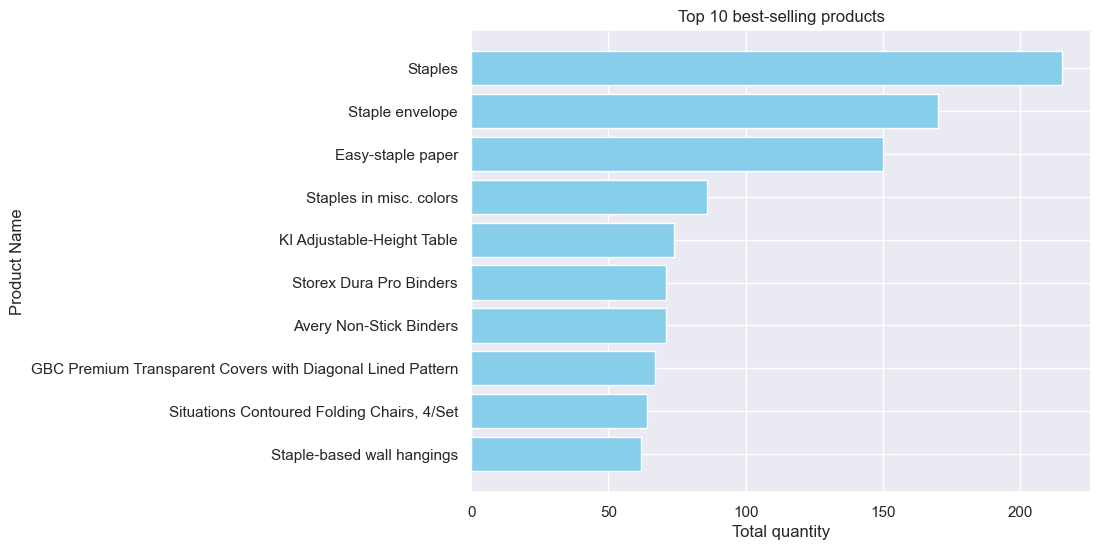

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(list(top_products_quantity.keys()), list(top_products_quantity.values), color="skyblue");
ax.set(title="Top 10 best-selling products", xlabel="Total quantity", ylabel="Product Name");
plt.gca().invert_yaxis()
plt.show()

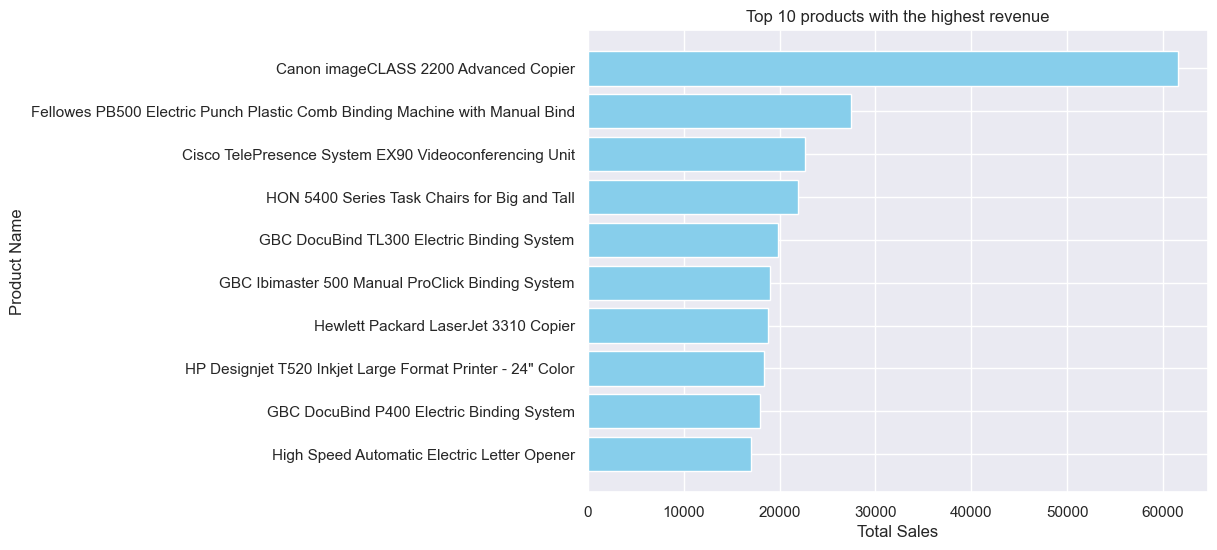

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(list(top_products_sales.keys()), list(top_products_sales.values), color="skyblue");
ax.set(title="Top 10 products with the highest revenue", xlabel="Total Sales", ylabel="Product Name");
plt.gca().invert_yaxis()
plt.show()

### 3.3. Sales by Region, Category and Sub-Category

In [18]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sub_category_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2192\3035485041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2192\3035485041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2192\3035485041.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

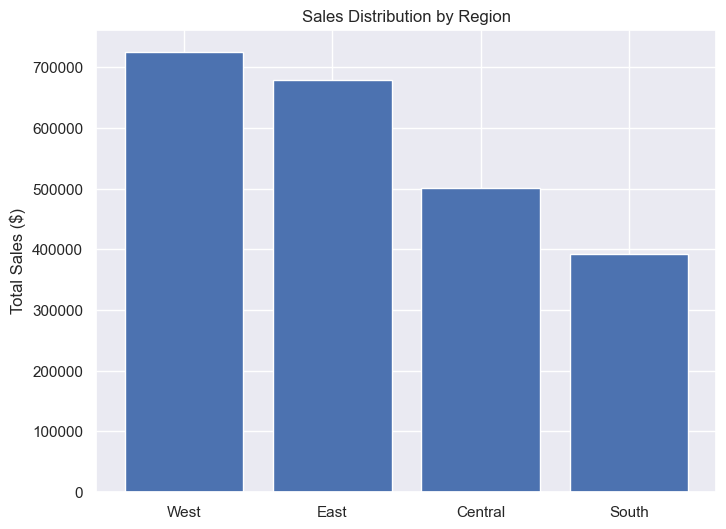

In [19]:
# bar chart for region_sales

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(region_sales.keys(), region_sales.values);
ax.set(title="Sales Distribution by Region", ylabel="Total Sales ($)");
plt.show()

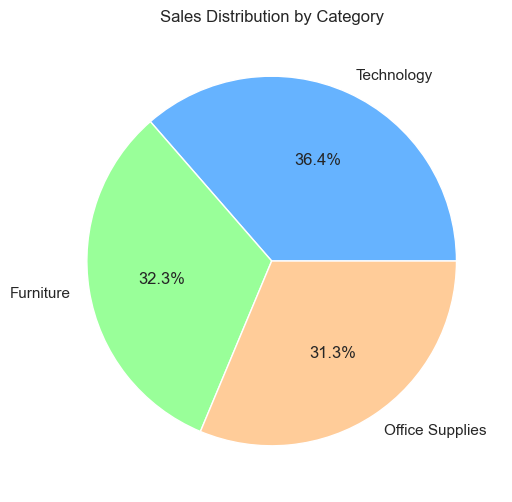

In [20]:
# pie chart for category_sales

plt.figure(figsize=(6,6))
category_sales.plot(kind="pie",autopct="%.1f%%",colors=["#66b3ff","#99ff99","#ffcc99"])
plt.title("Sales Distribution by Category")
plt.ylabel("");
plt.show()

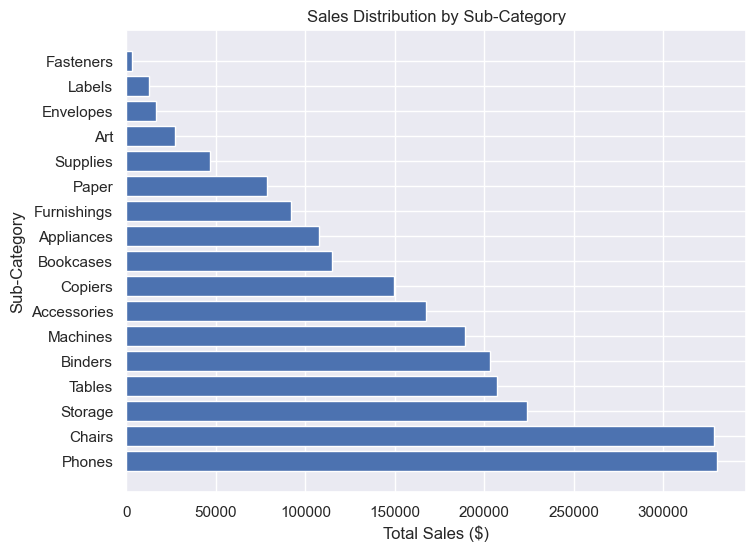

In [21]:
# horizontal bar chart for sub_category_sales

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(list(sub_category_sales.keys()), list(sub_category_sales.values));
ax.set(title="Sales Distribution by Sub-Category", xlabel="Total Sales ($)", ylabel="Sub-Category");
plt.show()

### 3.4. Revenue by month/year

In [22]:
monthly_sales = (df.groupby(["Year", "Month"])["Sales"].sum().reset_index().sort_values(["Year", "Month"]))

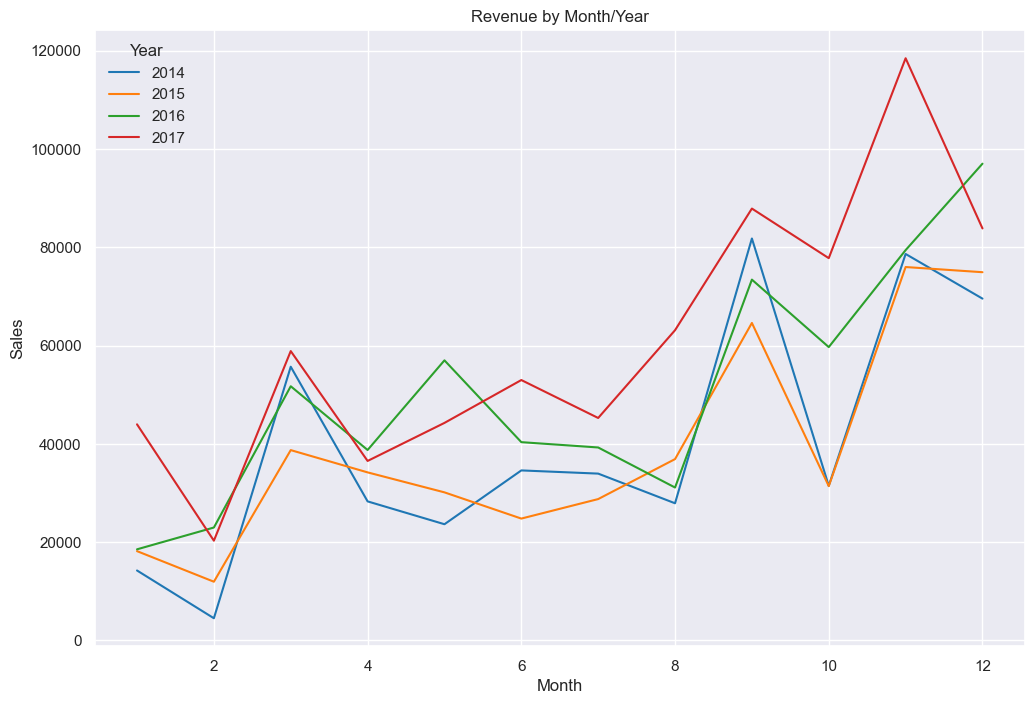

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="Sales", hue="Year", data=monthly_sales, palette="tab10")
plt.title("Revenue by Month/Year")
plt.show()


### 3.5. Sales growth trend

In [24]:
yearly_sales_trend = df.groupby("Year")["Sales"].sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2192\1228898789.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y="Sales", data=yearly_sales_trend, markers="o", palette="tab10")


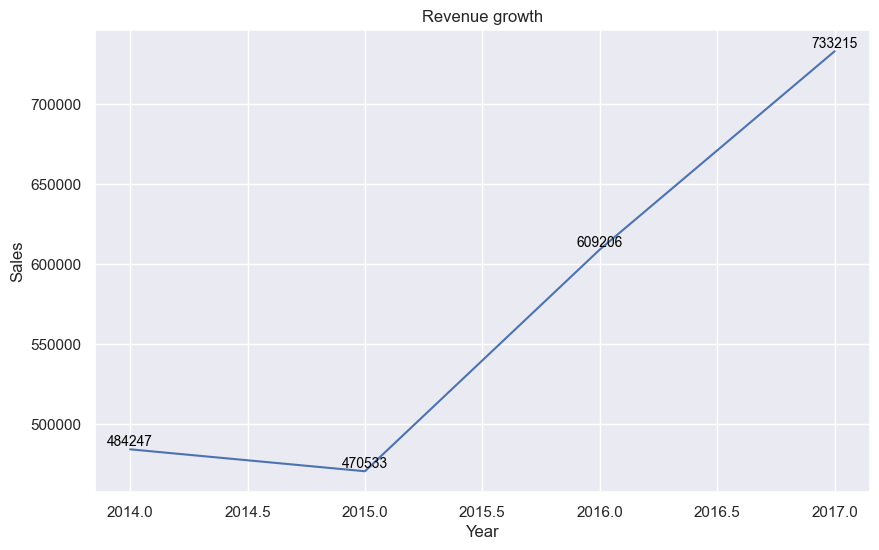

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Sales", data=yearly_sales_trend, markers="o", palette="tab10")


for i, row in yearly_sales_trend.iterrows():
    plt.text(
        row["Year"], row["Sales"],
        f"{row['Sales']:.0f}",
        ha="center", va="bottom", fontsize=10, color="black"
    )

plt.title("Revenue growth")
plt.show()

### 3.6. Profit margin

In [26]:
df["Profit_Margin"] = df["Profit"] / df["Sales"]

margin_by_category = (df
                        .groupby("Category")[["Sales", "Profit"]]
                        .sum()
                        .assign(Profit_Margin=lambda x: x["Profit"] / x["Sales"])
                    )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2192\655360073.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Category")[["Sales", "Profit"]]


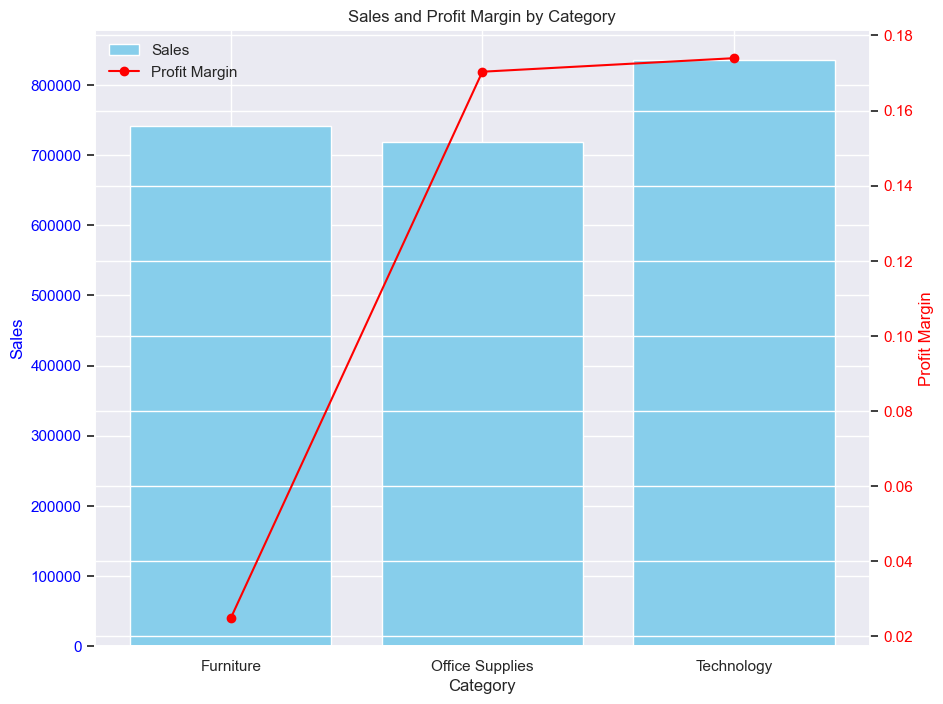

In [27]:
fig, ax1 = plt.subplots(figsize=(10,8))

# bar chart for Sales
ax1.bar(margin_by_category.index, margin_by_category["Sales"], color="skyblue", label="Sales")
ax1.set(xlabel="Category")
ax1.set_ylabel("Sales", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# y axis for Profit Margin
ax2 = ax1.twinx()
ax2.plot(margin_by_category.index, margin_by_category["Profit_Margin"], color="red", marker="o", label="Profit Margin")
ax2.set_ylabel("Profit Margin", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Sales and Profit Margin by Category")

# legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()


### 3.7. Impact of discount on profits

In [28]:
discount_profit = df.groupby("Discount")["Profit"].mean().reset_index()

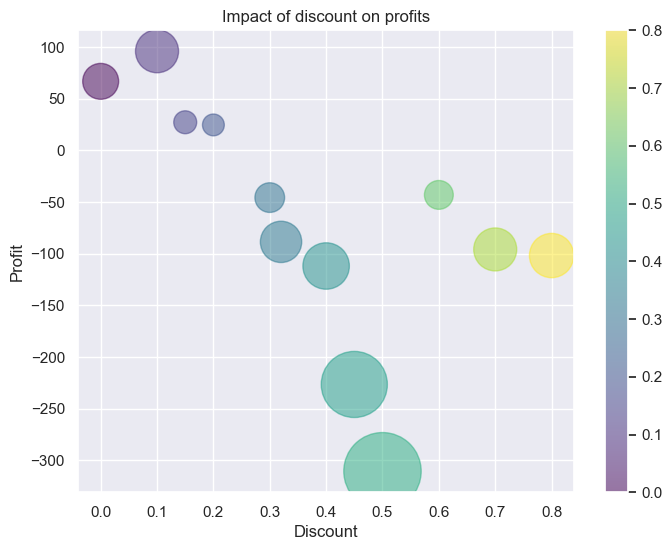

In [29]:
plt.figure(figsize=(8,6))
chart = plt.scatter(x="Discount", y="Profit", 
                data=discount_profit, 
                s=abs(discount_profit["Profit"])*10,
                c=discount_profit["Discount"],
                cmap='viridis',
                alpha=0.5);

cbar = plt.colorbar(chart)

plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Impact of discount on profits")

plt.show()